<a href="https://colab.research.google.com/github/fourfeatherz/DS2002S25/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [18]:
import sqlite3

connect = sqlite3.connect("superhero_db.sqlite")
cursor = connect.cursor()

#Create heroes table, with id as primary key, a name, powers, and team
cursor.execute('''
CREATE TABLE IF NOT EXISTS heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    power TEXT NOT NULL,
    team TEXT
);
''')

#Create villains table, with id as primary key, a name, and evil plans
cursor.execute('''
CREATE TABLE IF NOT EXISTS villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    evil_plan TEXT
)
''')

#Create battles table, with id as primary key, hero id and villain id as foreign keys, and an outcome
cursor.execute('''
CREATE TABLE IF NOT EXISTS battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER NOT NULL,
    villain_id INTEGER NOT NULL,
    outcome TEXT CHECK (outcome IN ('Hero Wins', 'Villain Wins', 'Draw')),
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villain_id) REFERENCES villains(id)
);
''')

## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [19]:
import pandas as pd
#Import heroes
heroes_df = pd.read_csv("heroes.csv")
heroes_df.to_sql("heroes", connect, if_exists="append", index=False)
#Import villains
villains_df = pd.read_csv("villains.csv")
villains_df.to_sql("villains", connect, if_exists="append", index=False)
#Import battles
battles_df = pd.read_csv("battles.csv")
battles_df.to_sql("battles", connect, if_exists="append", index=False)

30

## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [21]:
#Retrieve all superheroes and their powers.
query = "SELECT name, power FROM heroes"
print(pd.read_sql(query, connect))
#Find all battles where the hero won.
query = "SELECT * FROM battles WHERE outcome = 'Hero Wins'"
print(pd.read_sql(query, connect))
#List all villains and their evil plans.
query = "SELECT name, evil_plan FROM villains"
print(pd.read_sql(query, connect))
#Determine which superhero has fought the most battles.
query = """
SELECT h.name, COUNT(b.id) AS battle_count FROM battles b
JOIN heroes h ON b.hero_id = h.id
GROUP BY h.name
ORDER BY battle_count DESC
LIMIT 1
"""
print(pd.read_sql(query, connect))

             name               power
0      Spider-Man        Web-slinging
1        Iron Man       Powered Armor
2          Batman    Genius Detective
3        Superman      Super Strength
4            Thor      God of Thunder
5    Wonder Woman  Amazonian Strength
6   Black Panther    Enhanced Agility
7       The Flash         Super Speed
8            Hulk      Super Strength
9  Doctor Strange         Mystic Arts
   id  hero_id  villain_id    outcome
0   2        9           3  Hero Wins
1   5        1           7  Hero Wins
2   7        9           8  Hero Wins
3   8        3           2  Hero Wins
4   9        7           5  Hero Wins
5  13        8           9  Hero Wins
6  20        3           4  Hero Wins
7  29        3           5  Hero Wins
8  30        5           5  Hero Wins
           name                           evil_plan
0  Green Goblin                  Terrorize New York
1        Thanos         Collect all Infinity Stones
2         Joker              Spread chaos in G

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [30]:
#Create sidekicks table, with id as primary key, hero id as foreign keys, and a name
cursor.execute('''
CREATE TABLE IF NOT EXISTS sidekicks (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER,
    sidekick_name TEXT NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes(id)
)
''')

#Populate the sidekick table
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (1, 'Ned')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (2, 'War Machine')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (3, 'Robin')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (3, 'Nightwing')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (3, 'Red Robin')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (4, 'Superboy')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (6, 'Wonder Girl')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (7, 'Shuri')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (7, 'Okoye')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (8, 'Kid Flash')")
cursor.execute("INSERT INTO sidekicks (hero_id, sidekick_name) VALUES (10, 'Wong')")

connect.commit()

#List every sidekick and their respective hero
query = """
SELECT heroes.name, sidekicks.sidekick_name FROM heroes
JOIN sidekicks ON heroes.id = sidekicks.hero_id;
"""
print(pd.read_sql(query, connect))

              name sidekick_name
0       Spider-Man           Ned
1         Iron Man   War Machine
2           Batman         Robin
3           Batman     Nightwing
4           Batman     Red Robin
5         Superman      Superboy
6     Wonder Woman   Wonder Girl
7    Black Panther         Shuri
8    Black Panther         Okoye
9        The Flash     Kid Flash
10  Doctor Strange          Wong


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

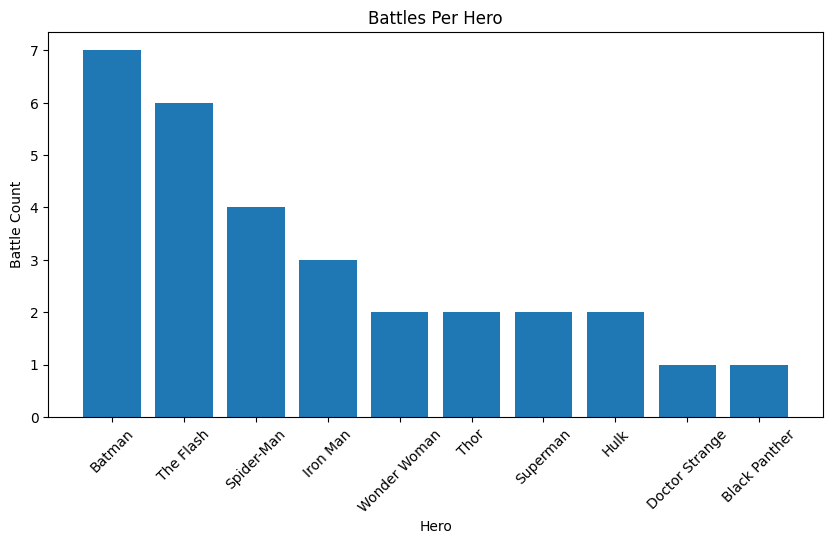

In [52]:
import matplotlib.pyplot as plt

query = """
SELECT h.name, COUNT(b.id) AS battle_count FROM battles b
JOIN heroes h ON b.hero_id = h.id
GROUP BY h.name
ORDER BY battle_count DESC
"""
df = pd.read_sql(query, connect)

plt.figure(figsize=(10, 5))
plt.bar(df["name"], df["battle_count"])
plt.xlabel("Hero")
plt.ylabel("Battle Count")
plt.title("Battles Per Hero")
plt.xticks(rotation=45)
plt.show()

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!